### 導入套件

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)
%matplotlib inline
import copy
import pickle
import requests # 讀取網頁資料
import bs4
from selenium import webdriver

In [2]:
floder_path = r'.\全國投開票所一覽表\總統副總統選舉'
file_lst = os.listdir(floder_path)
data = []
for filename in file_lst:
    df = pd.read_excel(fr'{floder_path}\{filename}', header=2, index_col=[0, 1]).iloc[3:, [0, 1, 2, 3]]
    df.index.names = ['Town', 'Village']
    df.columns = ['vote_ID', 1, 2, 3]
    df = df[np.invert(df.vote_ID.isna().values)]
    df = df.astype(np.int64)
    city = filename[-9:-6]
    df['City'] = city
    df.set_index(['City', df.index], inplace=True)
    data.append(df)

data = pd.concat(data)

C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no d

In [3]:
data

vote_ID    1    2    3
City Town Village                        
南投縣  　草屯鎮 玉峰里            1  184  267  261
          玉峰里            2  202  271  324
          明正里            3  271  377  355
          明正里            4  197  250  243
          明正里            5  245  230  360
...                    ...  ...  ...  ...
高雄市  　小港區 鳳興里         2034  183  483  168
          鳳興里         2035  199  460  149
          鳳源里         2036  154  467  133
          鳳源里         2037  176  486  176
          鳳源里         2038  150  460  144

[17795 rows x 4 columns]

In [4]:
City_lst = ['臺北市', '新北市', '臺中市', '臺南市', '高雄市', '基隆市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '南投縣', '彰化縣', '雲林縣', '嘉義市', '嘉義縣', '屏東縣',  '宜蘭縣', '花蓮縣', '臺東縣', '澎湖縣', '連江縣', '金門縣']

TW_vote = data.iloc[:, -3:].groupby('City').sum().loc[City_lst].copy()
columns = ['柯盈', '賴蕭', '侯康']
TW_vote.columns = columns
c_lst = ['#28C8C8', '#1B9431', '#000095'] # 色碼
TW_vote

,柯盈,賴蕭,侯康
City,,,
臺北市,366854,587899,587258
新北市,645105,948818,864557
臺中市,513025,641622,552556
臺南市,262560,570811,286867
高雄市,358096,800390,478476
基隆市,58195,76079,84507
桃園市,413528,476441,460823
新竹市,91384,92679,82326
新竹縣,120985,93309,126016


In [5]:
arr = TW_vote.values.T
arr = arr / arr.sum(0) * 100

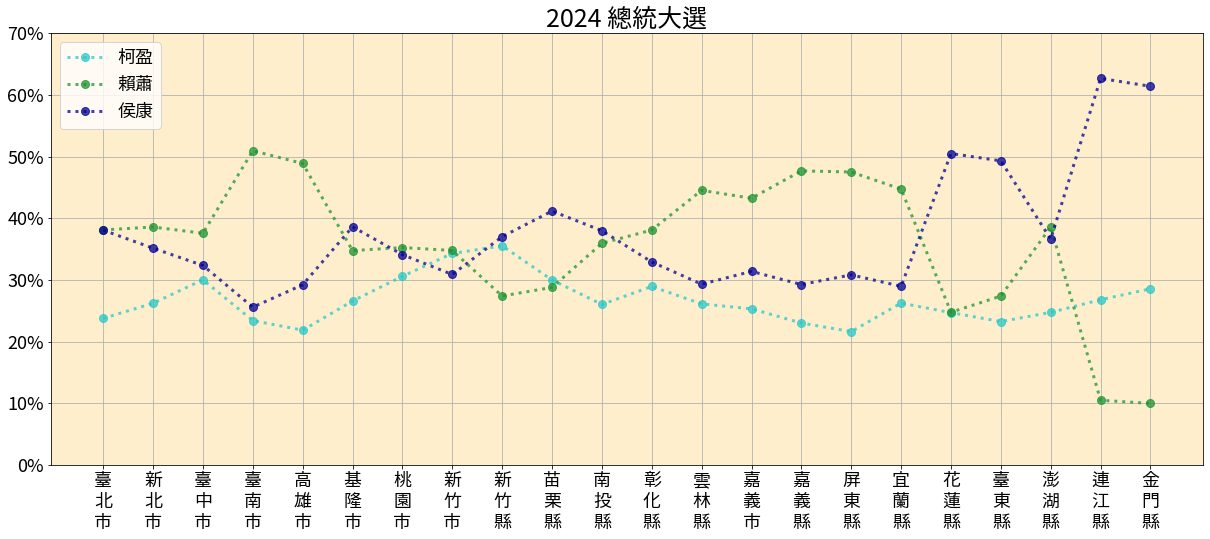

In [6]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(3):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=TW_vote.columns[i])
    
xticks = list(TW_vote.index.str[-3]  + '\n' + TW_vote.index.str[-2] + '\n' + TW_vote.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 71, 10), [str(s)+'%' for s in range(0, 71, 10)], fontsize=18)
plt.ylim([0, 70])
plt.title('2024 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)



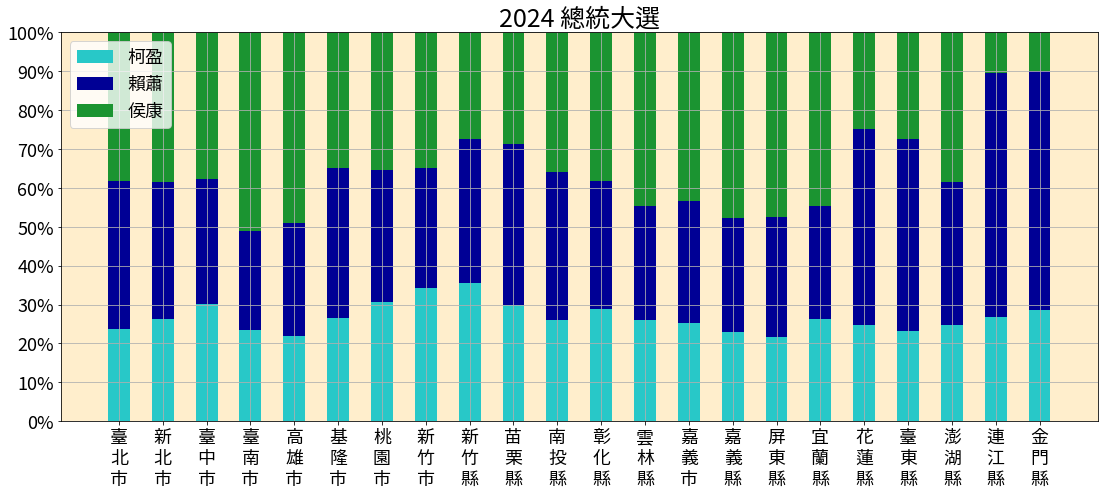

In [7]:
sort = [0, 2, 1] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9], facecolor='#ffeecc')

for i in range(3):
    ax.bar(np.arange(22), arrsort[i], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=columns[i])
 
xticks = list(TW_vote.index.str[-3]  + '\n' + TW_vote.index.str[-2] + '\n' + TW_vote.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2024 總統大選', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)